<a href="https://colab.research.google.com/github/Gaurav1401/Deep-Learning/blob/main/Practice/CNN/Cell_Image/CNN_on_Real_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
from matplotlib.image import imread
import glob

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
test_path = "/content/gdrive/MyDrive/Udemy - Complete Tensorflow 2 and Keras Deep Learning Bootcamp 2020-1/cell_images/test/"
train_path = "/content/gdrive/MyDrive/Udemy - Complete Tensorflow 2 and Keras Deep Learning Bootcamp 2020-1/cell_images/train/"

In [6]:
len(glob.glob(train_path+"/parasitized/*.*"))

12480

In [7]:
len(glob.glob(train_path+"/uninfected/*.*"))

12480

In [8]:
para_cell = imread(glob.glob(train_path+"/parasitized/*.*")[0])

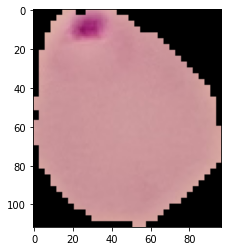

In [9]:
plt.imshow(para_cell)

In [10]:
dim1 = []
dim2 = []

for image_filename in glob.glob(test_path+"/uninfected/*.*"):
  img = imread(image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

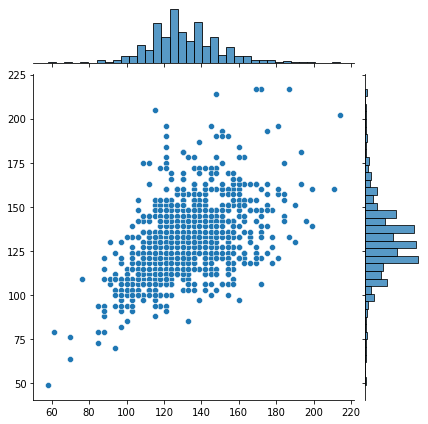

In [11]:
sns.jointplot(dim1, dim2)

**Here we can clearly see that dimensions of all the images is varying but our model can't inteerpre the images having different dimensions, we need to make it uniform**

In [12]:
image_shape = (130, 130, 3)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True,
                               fill_mode = 'nearest')

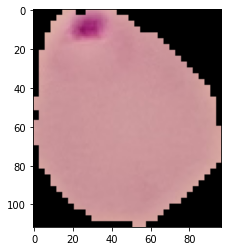

In [15]:
plt.imshow(para_cell)

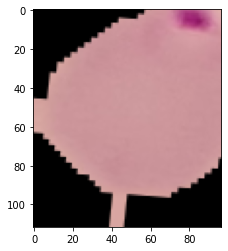

In [16]:
plt.imshow(image_gen.random_transform(para_cell))

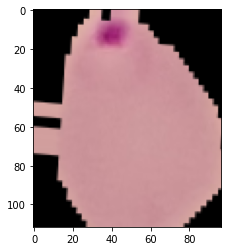

In [17]:
plt.imshow(image_gen.random_transform(para_cell))

In [18]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [24]:
batch_size = 16

In [25]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size = image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 24958 images belonging to 2 classes.


In [26]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size = image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary',
                                               shuffle = False)

Found 2600 images belonging to 2 classes.


In [27]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [28]:
# results = model.fit_generator(train_image_gen,
#                               epochs = 20,
#                               validation_data = test_image_gen,
#                               call_backs = [early_stop])

In [29]:
from tensorflow.keras.models import load_model

In [31]:
model = load_model('malaria_detector.h5')

In [32]:
model.evaluate_generator(test_image_gen)

[36.571632385253906, 0.8757692575454712]

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
pred = model.predict_generator(test_image_gen)

In [35]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [36]:
predictions = pred > 0.5

In [37]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [38]:
len(pred)

2600

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.98      0.77      0.86      1300

    accuracy                           0.88      2600
   macro avg       0.89      0.88      0.87      2600
weighted avg       0.89      0.88      0.87      2600



In [42]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1276,   24],
       [ 301,  999]])

In [43]:
from tensorflow.keras.preprocessing import image

In [51]:
my_image = image.load_img(glob.glob(train_path+"/parasitized/*.*")[0], target_size=image_shape)

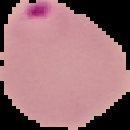

In [52]:
my_image

In [56]:
my_image_arr = image.img_to_array(my_image)

In [57]:
my_image_arr.shape

(130, 130, 3)

In [58]:
my_image_arr = np.expand_dims(my_image_arr, axis = 0)

In [59]:
my_image_arr.shape

(1, 130, 130, 3)

In [60]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)

In [61]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}